# summary of our call with Namsoo today:
## 1)purpose of flight per number of engines
## 2)try different purpose of. flight per number of engines
## 3)which engine number is safer per fatality rates?
## 4) within that number of engines, which engine type is common and safer ?
## 5)which model/make is the safest per number of engines ? within that number of each type? which make/model is safe within each number of engines?
## 6)the top 5 most popular maker/model, which one has less fatality rate? 
## 7) engine number and engine type based on year 
## 8)for each engiene number , which model/maker is safe?

In [19]:
!ls

Airplane-Project          Namsoo.ipynb              airplane_purchase_project


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("airplane_purchase_project/AviationData.csv", encoding='latin-1')

/var/folders/sf/jkklx58940qbt_9v7c47hrgw0000gp/T/ipykernel_1502/1572144143.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airplane_purchase_project/AviationData.csv", encoding='latin-1')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [22]:
df["Aircraft.Category"].value_counts()

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [23]:
df = df[df["Aircraft.Category"] == "Airplane"]

In [11]:
# Adding "Year" column
df["Year"] = df["Event.Date"].map(lambda x : x[:4] )

/var/folders/sf/jkklx58940qbt_9v7c47hrgw0000gp/T/ipykernel_1502/2273781203.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years, rotation = 90)


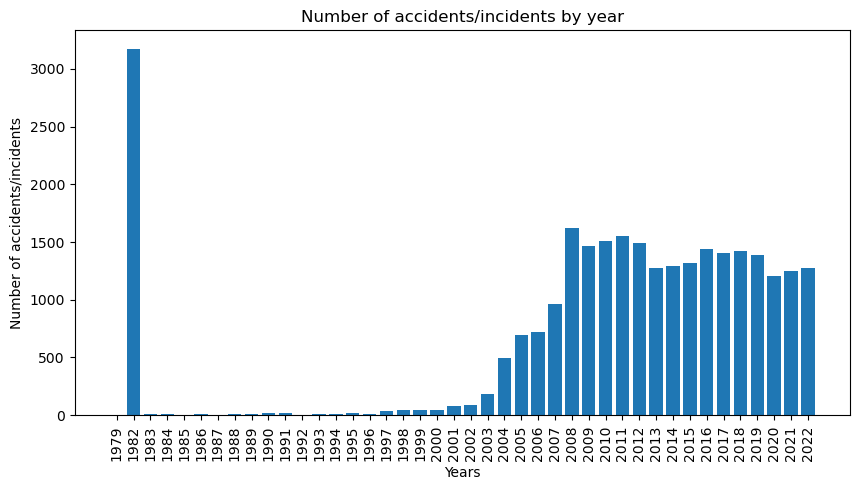

In [12]:
# Investigating frequency of accidents/incidents by year
years = df["Year"].value_counts().sort_index().index
fre_years = df["Year"].value_counts().sort_index().values

# Plotting
fig, ax = plt.subplots( figsize = (10, 5))
ax.bar(years, fre_years)
ax.set_xticklabels(years, rotation = 90)
ax.set_ylabel("Number of accidents/incidents")
ax.set_xlabel("Years")
ax.set_title("Number of accidents/incidents by year");

/var/folders/sf/jkklx58940qbt_9v7c47hrgw0000gp/T/ipykernel_1502/2940863099.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years, rotation = 90)


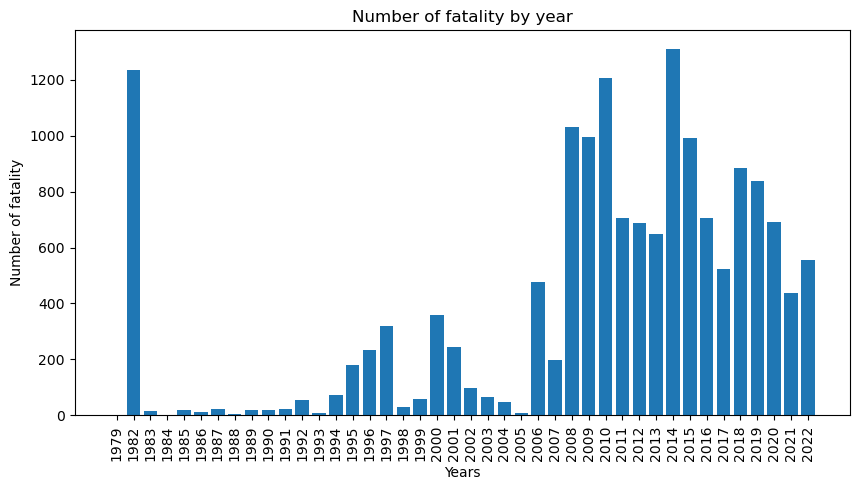

In [13]:
# Investigating fatality by year ----- need to change to graph
a_year = df.groupby("Year")["Total.Fatal.Injuries"].sum().index
fatality = df.groupby("Year")["Total.Fatal.Injuries"].sum().values

# Plotting
fig, ax = plt.subplots( figsize = (10, 5))
ax.bar(a_year, fatality)
ax.set_xticklabels(years, rotation = 90)
ax.set_ylabel("Number of fatality")
ax.set_xlabel("Years")
ax.set_title("Number of fatality by year");

In [14]:
df["Number.of.Engines"].value_counts(normalize = True)

Number.of.Engines
1.0    0.851707
2.0    0.141375
4.0    0.004143
3.0    0.002333
0.0    0.000362
8.0    0.000040
6.0    0.000040
Name: proportion, dtype: float64

In [24]:
df["Number.of.Engines"].isna().sum()

2754

In [25]:
df["Engine.Type"].isna().sum()

4226

In [15]:
df["Engine.Type"].value_counts(normalize = True)

Engine.Type
Reciprocating      0.885597
Turbo Prop         0.058399
Turbo Fan          0.041469
Turbo Jet          0.006755
Unknown            0.006541
Geared Turbofan    0.000513
Turbo Shaft        0.000470
Electric           0.000214
UNK                0.000043
Name: proportion, dtype: float64

In [16]:
df_engine = df[df["Number.of.Engines"] > 1]
df_engine["Number.of.Engines"].value_counts(normalize = True)

Number.of.Engines
2.0    0.955682
4.0    0.028004
3.0    0.015769
8.0    0.000272
6.0    0.000272
Name: proportion, dtype: float64

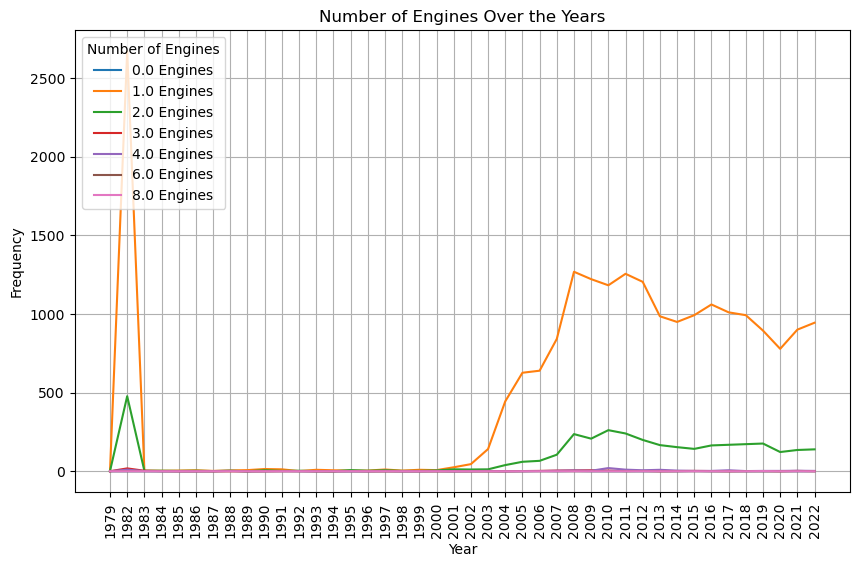

In [17]:
# Want to see engine number based on year 
# Pivot the DataFrame to have each unique number_of_engines as a separate column
pivot_df = df.pivot_table(index='Year', columns='Number.of.Engines', aggfunc='size', fill_value=0)

# Create a line plot for each column
plt.figure(figsize=(10, 6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=f'{column} Engines')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Engines Over the Years')
plt.legend(title='Number of Engines', loc='upper left')
plt.grid(True)
plt.xticks(rotation = 90)

# Show the plot
plt.show()

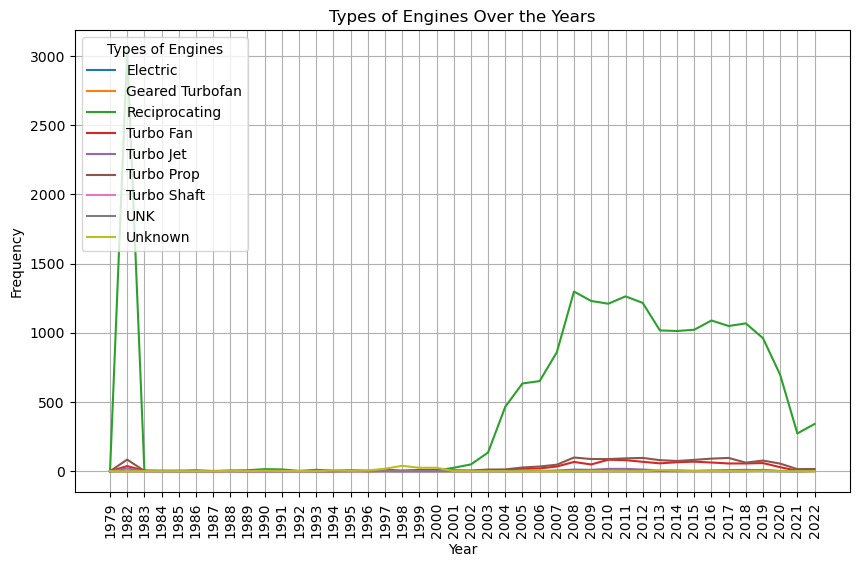

In [18]:
# Want to see engine type based on year 
# Pivot the DataFrame to have each unique number_of_engines as a separate column
pivot_df1 = df.pivot_table(index='Year', columns='Engine.Type', aggfunc='size', fill_value=0)

# Create a line plot for each column
plt.figure(figsize=(10, 6))
for column in pivot_df1.columns:
    plt.plot(pivot_df1.index, pivot_df1[column], label=f'{column}')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Types of Engines Over the Years')
plt.legend(title='Types of Engines', loc='upper left')
plt.grid(True)
plt.xticks(rotation = 90)

# Show the plot
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null